# Statistical tests

In [19]:
import numpy
import scipy.stats
import pandas

def compare_averages(filename):
    """
    Performs a t-test on two sets of baseball data (left-handed and right-handed hitters).

    You will be given a csv file that has three columns.  A player's
    name, handedness (L for lefthanded or R for righthanded) and their
    career batting average (called 'avg'). You can look at the csv
    file by downloading the baseball_stats file from Downloadables below. 
    
    Write a function that will read that the csv file into a pandas data frame,
    and run Welch's t-test on the two cohorts defined by handedness.
    
    One cohort should be a data frame of right-handed batters. And the other
    cohort should be a data frame of left-handed batters.
    
    We have included the scipy.stats library to help you write
    or implement Welch's t-test:
    http://docs.scipy.org/doc/scipy/reference/stats.html
    
    With a significance level of 95%, if there is no difference
    between the two cohorts, return a tuple consisting of
    True, and then the tuple returned by scipy.stats.ttest.  
    
    If there is a difference, return a tuple consisting of
    False, and then the tuple returned by scipy.stats.ttest.
    
    For example, the tuple that you return may look like:
    (True, (9.93570222, 0.000023))
    """
    df = pandas.read_csv(filename)
    df_L = df[df.handedness == 'L'].avg
    df_R = df[df.handedness == 'R'].avg
    
    t_statistic, pvalue = scipy.stats.ttest_ind(df_L, df_R, equal_var=False)
    return pvalue > 0.05, (t_statistic, pvalue)


In [20]:
filename = 'baseball_stats.csv'
compare_averages(filename)

(False, (9.935702226242094, 3.810274225888738e-23))

# Gradient descent

In [1]:
import numpy
import pandas

def compute_cost(features, values, theta):
    """
    Compute the cost of a list of parameters, theta, given a list of features 
    (input data points) and values (output data points).
    """
    m = len(values)
    sum_of_square_errors = numpy.square(numpy.dot(features, theta) - values).sum()
    cost = sum_of_square_errors / (2*m)

    return cost

def gradient_descent(features, values, theta, alpha, num_iterations):
    """
    Perform gradient descent given a data set with an arbitrary number of features.
    """

    # Write code here that performs num_iterations updates to the elements of theta.
    # times. Every time you compute the cost for a given list of thetas, append it 
    # to cost_history.
    # See the Instructor notes for hints. 
    
    cost_history = []
    m = len(values)
    for interations in range(num_iterations):
        cost_history.append(compute_cost(features, values, theta))
        sum_of_errors = numpy.dot(values + numpy.dot(features, theta),features)
        theta = theta + (alpha/m)*sum_of_errors
        
    return theta, pandas.Series(cost_history) # leave this line for the grader


In [ ]:
import numpy as np

def compute_r_squared(data, predictions):
    # Write a function that, given two input numpy arrays, 'data', and 'predictions,'
    # returns the coefficient of determination, R^2, for the model that produced 
    # predictions.
    # 
    # Numpy has a couple of functions -- np.mean() and np.sum() --
    # that you might find useful, but you don't have to use them.

    r_squared = 1- sum((predictions - data)**2)/sum((data - np.mean(data))**2)

    return r_squared

In [18]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

def entries_histogram(turnstile_weather):
    '''
    Before we perform any analysis, it might be useful to take a
    look at the data we're hoping to analyze. More specifically, let's 
    examine the hourly entries in our NYC subway data and determine what
    distribution the data follows. This data is stored in a dataframe
    called turnstile_weather under the ['ENTRIESn_hourly'] column.
    
    Let's plot two histograms on the same axes to show hourly
    entries when raining vs. when not raining. Here's an example on how
    to plot histograms with pandas and matplotlib:
    turnstile_weather['column_to_graph'].hist()
    
    Your histogram may look similar to bar graph in the instructor notes below.
    
    You can read a bit about using matplotlib and pandas to plot histograms here:
    http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms
    
    You can see the information contained within the turnstile weather data here:
    https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv
    '''
    
    plt.figure()
    turnstile_weather[turnstile_weather['rain']==0]['ENTRIESn_hourly'].hist(bins = 150, label = 'No rain') # your code here to plot a historgram for hourly entries when it is raining
    turnstile_weather[turnstile_weather['rain']==1]['ENTRIESn_hourly'].hist(bins = 150, label = 'Rain') # your code here to plot a historgram for hourly entries when it is not raining
    return plt


<module 'matplotlib.pyplot' from 'C:\\Users\\vipac\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

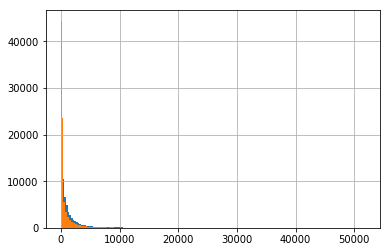

In [19]:
turnstile_weather = pandas.read_csv('turnstile_data_master_with_weather.csv')
entries_histogram(turnstile_weather)

In [31]:
import numpy as np
import scipy
import scipy.stats
import pandas

def mann_whitney_plus_means(turnstile_weather):
    '''
    This function will consume the turnstile_weather dataframe containing
    our final turnstile weather data. 
    
    You will want to take the means and run the Mann Whitney U-test on the 
    ENTRIESn_hourly column in the turnstile_weather dataframe.
    
    This function should return:
        1) the mean of entries with rain
        2) the mean of entries without rain
        3) the Mann-Whitney U-statistic and p-value comparing the number of entries
           with rain and the number of entries without rain
    
    You should feel free to use scipy's Mann-Whitney implementation, and you 
    might also find it useful to use numpy's mean function.
    
    Here are the functions' documentation:
    http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
    
    You can look at the final turnstile weather data at the link below:
    https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv
    '''
    with_rain_mean = np.mean(turnstile_weather[turnstile_weather.rain == 1].ENTRIESn_hourly)
    without_rain_mean = np.mean(turnstile_weather[turnstile_weather.rain == 0].ENTRIESn_hourly)
    U, p = scipy.stats.mannwhitneyu(turnstile_weather[turnstile_weather.rain == 1].ENTRIESn_hourly, 
                                    turnstile_weather[turnstile_weather.rain == 0].ENTRIESn_hourly)
    
    return with_rain_mean, without_rain_mean, U, p # leave this line for the grader


In [32]:
mann_whitney_plus_means(turnstile_weather)

(1105.4463767458733, 1090.278780151855, 1924409167.0, 0.024940392294493356)

In [2]:
import numpy as np
import pandas
from ggplot import *

"""
In this question, you need to:
1) implement the compute_cost() and gradient_descent() procedures
2) Select features (in the predictions procedure) and make predictions.

"""

def normalize_features(df):
    """
    Normalize the features in the data set.
    """
    mu = df.mean()
    sigma = df.std()
    
    if (sigma == 0).any():
        raise Exception("One or more features had the same value for all samples, and thus could " + \
                         "not be normalized. Please do not include features with only a single value " + \
                         "in your model.")
    df_normalized = (df - df.mean()) / df.std()

    return df_normalized, mu, sigma

def compute_cost(features, values, theta):
    """
    Compute the cost function given a set of features / values, 
    and the values for our thetas.
    
    This can be the same code as the compute_cost function in the lesson #3 exercises,
    but feel free to implement your own.
    """
    
    m = len(values)
    sum_of_square_errors = np.square(np.dot(features, theta) - values).sum()
    cost = sum_of_square_errors / (2*m)

    return cost

def gradient_descent(features, values, theta, alpha, num_iterations):
    """
    Perform gradient descent given a data set with an arbitrary number of features.
    
    This can be the same gradient descent code as in the lesson #3 exercises,
    but feel free to implement your own.
    """
    cost_history = []
    m = len(values)

    for interations in range(num_iterations):
        cost_history.append(compute_cost(features, values, theta))
        sum_of_errors = np.dot(values + np.dot(features, theta),features)
        theta = theta + (alpha/m)*sum_of_errors
        
    return theta, pandas.Series(cost_history) # leave this line for the grader

def predictions(dataframe):
    '''
    The NYC turnstile data is stored in a pandas dataframe called weather_turnstile.
    Using the information stored in the dataframe, let's predict the ridership of
    the NYC subway using linear regression with gradient descent.
    
    You can download the complete turnstile weather dataframe here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv    
    
    Your prediction should have a R^2 value of 0.40 or better.
    You need to experiment using various input features contained in the dataframe. 
    We recommend that you don't use the EXITSn_hourly feature as an input to the 
    linear model because we cannot use it as a predictor: we cannot use exits 
    counts as a way to predict entry counts. 
    
    Note: Due to the memory and CPU limitation of our Amazon EC2 instance, we will
    give you a random subet (~15%) of the data contained in 
    turnstile_data_master_with_weather.csv. You are encouraged to experiment with 
    this computer on your own computer, locally. 
    
    
    If you'd like to view a plot of your cost history, uncomment the call to 
    plot_cost_history below. The slowdown from plotting is significant, so if you 
    are timing out, the first thing to do is to comment out the plot command again.
    
    If you receive a "server has encountered an error" message, that means you are 
    hitting the 30-second limit that's placed on running your program. Try using a 
    smaller number for num_iterations if that's the case.
    
    If you are using your own algorithm/models, see if you can optimize your code so 
    that it runs faster.
    '''
    # Select Features (try different features!)
    features = dataframe[['rain', 'precipi', 'Hour', 'meantempi']]
    # 'DESCn', 'ENTRIESn_hourly', 'EXITSn_hourly', 'maxpressurei', 'maxdewpti',
    #   'mindewpti', 'minpressurei', 'meandewpti', 'meanpressurei', 'fog',
    #   'rain', 'meanwindspdi', 'mintempi', 'meantempi', 'maxtempi', 'precipi',
    # Add UNIT to features using dummy variables
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    m = len(values)

    features, mu, sigma = normalize_features(features)
    features['ones'] = np.ones(m) # Add a column of 1s (y intercept)
    
    # Convert features and values to numpy arrays
    features_array = np.array(features)
    values_array = np.array(values)

    # Set values for alpha, number of iterations.
    alpha = 0.01 # please feel free to change this value
    num_iterations = 75 # please feel free to change this value

    # Initialize theta, perform gradient descent
    theta_gradient_descent = np.zeros(len(features.columns))
    theta_gradient_descent, cost_history = gradient_descent(features_array, 
                                                            values_array, 
                                                            theta_gradient_descent, 
                                                            alpha, 
                                                            num_iterations)
    
    plot = None
    # -------------------------------------------------
    # Uncomment the next line to see your cost history
    # -------------------------------------------------
    plot = plot_cost_history(alpha, cost_history)
    # 
    # Please note, there is a possibility that plotting
    # this in addition to your calculation will exceed 
    # the 30 second limit on the compute servers.
    
    predictions = np.dot(features_array, theta_gradient_descent)
    return predictions, plot


def plot_cost_history(alpha, cost_history):
    """This function is for viewing the plot of your cost history.
    You can run it by uncommenting this

       plot_cost_history(alpha, cost_history) 

    call in predictions.

    If you want to run this locally, you should print the return value
    from this function.
    """
    cost_df = pandas.DataFrame({
      'Cost_History': cost_history,
      'Iteration': range(len(cost_history))
    })
    return ggplot(cost_df, aes('Iteration', 'Cost_History')) + \
      geom_point() + ggtitle('Cost History for alpha = %.3f' % alpha )

C:\Users\vipac\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:14: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [3]:
turnstile_weather = pandas.read_csv('turnstile_data_master_with_weather.csv')

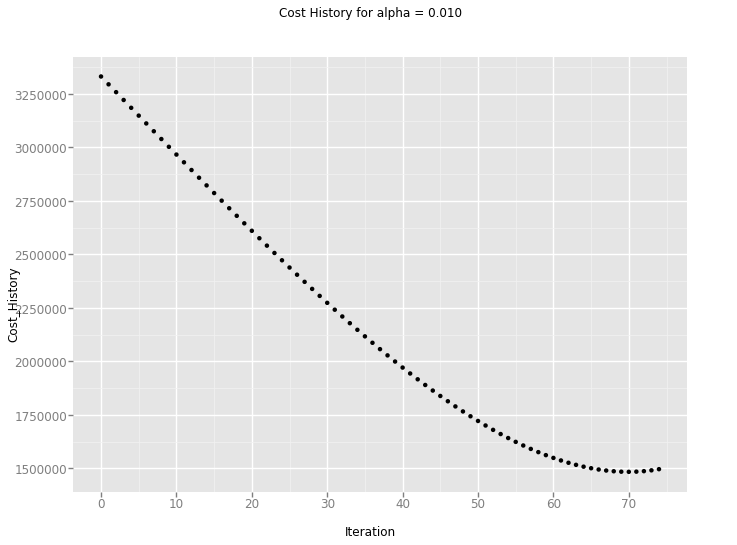

(array([3907.40549276, 4157.41750312, 4407.42951347, ...,  882.09266464,
         882.09266464,  882.09266464]), <ggplot: (133282046805)>)

In [3]:
predictions(turnstile_weather)

In [28]:
turnstile_weather.columns

Index(['Unnamed: 0', 'UNIT', 'DATEn', 'TIMEn', 'Hour', 'DESCn',
       'ENTRIESn_hourly', 'EXITSn_hourly', 'maxpressurei', 'maxdewpti',
       'mindewpti', 'minpressurei', 'meandewpti', 'meanpressurei', 'fog',
       'rain', 'meanwindspdi', 'mintempi', 'meantempi', 'maxtempi', 'precipi',
       'thunder'],
      dtype='object')

## Plotting residuals

In [5]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

def plot_residuals(turnstile_weather, predictions):
    '''
    Using the same methods that we used to plot a histogram of entries
    per hour for our data, why don't you make a histogram of the residuals
    (that is, the difference between the original hourly entry data and the predicted values).
    Try different binwidths for your histogram.

    Based on this residual histogram, do you have any insight into how our model
    performed?  Reading a bit on this webpage might be useful:

    http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm
    '''
    
    plt.figure()
    (turnstile_weather['ENTRIESn_hourly'] - predictions).hist(bins = 1000)
    return plt

## computing R^2 

In [53]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sys

def compute_r_squared(data, predictions):
    '''
    In exercise 5, we calculated the R^2 value for you. But why don't you try and
    and calculate the R^2 value yourself.
    
    Given a list of original data points, and also a list of predicted data points,
    write a function that will compute and return the coefficient of determination (R^2)
    for this data.  numpy.mean() and numpy.sum() might both be useful here, but
    not necessary.

    Documentation about numpy.mean() and numpy.sum() below:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html
    '''
    ssres = np.sum((np.array(data) - np.array(predictions))**2)
    sstot = np.sum((data - np.mean(data))**2)
    r_squared = 1 - ssres/sstot
    
    return r_squared

In [54]:
lista1 = np.random.random_sample(10000)
lista2 = np.random.random_sample(10000)

In [55]:
%%time
compute_r_squared(lista1,lista2)

Wall time: 0 ns


-0.9899890304307952

## getting wild!

In [31]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas
import scipy
import statsmodels.api as sm

"""
In this optional exercise, you should complete the function called 
predictions(turnstile_weather). This function takes in our pandas 
turnstile weather dataframe, and returns a set of predicted ridership values,
based on the other information in the dataframe.  

In exercise 3.5 we used Gradient Descent in order to compute the coefficients
theta used for the ridership prediction. Here you should attempt to implement 
another way of computing the coeffcients theta. You may also try using a reference implementation such as: 
http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.html

One of the advantages of the statsmodels implementation is that it gives you
easy access to the values of the coefficients theta. This can help you infer relationships 
between variables in the dataset.

You may also experiment with polynomial terms as part of the input variables.  

The following links might be useful: 
http://en.wikipedia.org/wiki/Ordinary_least_squares
http://en.wikipedia.org/w/index.php?title=Linear_least_squares_(mathematics)
http://en.wikipedia.org/wiki/Polynomial_regression

This is your playground. Go wild!

How does your choice of linear regression compare to linear regression
with gradient descent computed in Exercise 3.5?

You can look at the information contained in the turnstile_weather dataframe below:
https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Note: due to the memory and CPU limitation of our amazon EC2 instance, we will
give you a random subset (~10%) of the data contained in turnstile_data_master_with_weather.csv

If you receive a "server has encountered an error" message, that means you are hitting 
the 30 second limit that's placed on running your program. See if you can optimize your code so it
runs faster.
"""

def predictions(weather_turnstile):
    
    features = weather_turnstile[['rain', 'precipi', 'Hour', 'meantempi']]
    
    # Add UNIT to features using dummy variables
    dummy_units = pandas.get_dummies(weather_turnstile['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Dataset
    X, _, _  = normalize_features(features)
    X = sm.add_constant(X)    
    y = weather_turnstile['ENTRIESn_hourly']
    
    model = sm.OLS(y,X)
    model = model.fit()
    print(model.summary())
    prediction = model.predict(X)

    return prediction


In [32]:
predictions(turnstile_weather)

                            OLS Regression Results                            
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     237.4
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:03:26   Log-Likelihood:            -1.1703e+06
No. Observations:              131951   AIC:                         2.342e+06
Df Residuals:                  131482   BIC:                         2.346e+06
Df Model:                         468                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1095.4606      4.746    230.833      0.0

0         3378.464844
1         3648.089844
2         3917.714844
3         4187.277344
4         4456.902344
5         4726.527344
6          313.027344
7          582.589844
8          852.214844
9         1121.839844
10        1391.464844
11        1661.027344
12        -459.347656
13        -189.722656
14         349.464844
15         619.089844
16         888.714844
17        -120.222656
18         149.402344
19         419.027344
20         688.589844
21         958.214844
22        1227.839844
23        -150.722656
24         118.839844
25         658.089844
26         927.714844
27        1197.277344
28         -79.410156
29         190.214844
             ...     
131921     453.093750
131922     520.500000
131923     520.500000
131924     520.500000
131925     520.500000
131926     587.906250
131927     587.906250
131928     587.906250
131929     587.906250
131930     587.906250
131931     587.906250
131932     587.906250
131933     655.312500
131934     655.312500
131935    

In [5]:
features = turnstile_weather[['rain', 'precipi', 'Hour', 'meantempi']]

In [6]:
# Add UNIT to features using dummy variables
dummy_units = pandas.get_dummies(turnstile_weather['UNIT'], prefix='unit')
features = features.join(dummy_units)

In [9]:
# Dataset
X, _, _ = normalize_features(features)
X.sample(5)

,rain,precipi,Hour,meantempi,unit_R001,unit_R002,unit_R003,unit_R004,unit_R005,unit_R006,...,unit_R543,unit_R544,unit_R545,unit_R546,unit_R547,unit_R548,unit_R549,unit_R550,unit_R551,unit_R552
59125,-0.708556,-0.401572,1.320913,-0.497805,-0.037571,-0.037267,-0.036128,-0.036546,-0.036442,-0.037974,...,-0.180111,-0.124717,-0.118295,-0.116135,-0.078444,-0.068875,-0.319153,-0.234557,-0.15562,-0.165286
60277,-0.708556,-0.401572,0.160161,-0.497805,-0.037571,-0.037267,-0.036128,-0.036546,-0.036442,-0.037974,...,-0.180111,-0.124717,-0.118295,-0.116135,-0.078444,-0.068875,-0.319153,-0.234557,-0.15562,-0.165286
63107,1.411311,1.672997,-1.000591,-0.041065,-0.037571,-0.037267,-0.036128,-0.036546,-0.036442,-0.037974,...,-0.180111,-0.124717,-0.118295,-0.116135,-0.078444,-0.068875,-0.319153,-0.234557,-0.15562,-0.165286
82627,1.411311,-0.238404,1.611101,0.567921,-0.037571,-0.037267,-0.036128,-0.036546,-0.036442,-0.037974,...,5.552104,-0.124717,-0.118295,-0.116135,-0.078444,-0.068875,-0.319153,-0.234557,-0.15562,-0.165286
3814,-0.708556,-0.401572,0.885631,-0.650052,-0.037571,-0.037267,-0.036128,-0.036546,-0.036442,-0.037974,...,-0.180111,-0.124717,-0.118295,-0.116135,-0.078444,-0.068875,3.133266,-0.234557,-0.15562,-0.165286


In [12]:
X = sm.add_constant(X)    
X.sample(5)

,const,rain,precipi,Hour,meantempi,unit_R001,unit_R002,unit_R003,unit_R004,unit_R005,...,unit_R543,unit_R544,unit_R545,unit_R546,unit_R547,unit_R548,unit_R549,unit_R550,unit_R551,unit_R552
53207,1.0,-0.708556,-0.401572,-1.580967,-0.650052,-0.037571,-0.037267,-0.036128,-0.036546,-0.036442,...,-0.180111,-0.124717,-0.118295,-0.116135,-0.078444,-0.068875,-0.319153,-0.234557,-0.15562,-0.165286
22271,1.0,-0.708556,-0.401572,1.611101,-1.259038,-0.037571,-0.037267,-0.036128,-0.036546,-0.036442,...,-0.180111,-0.124717,-0.118295,-0.116135,-0.078444,-0.068875,-0.319153,-0.234557,-0.15562,6.050067
73333,1.0,1.411311,1.160182,-0.420215,-1.259038,-0.037571,-0.037267,-0.036128,-0.036546,-0.036442,...,-0.180111,-0.124717,-0.118295,-0.116135,-0.078444,-0.068875,-0.319153,-0.234557,-0.15562,-0.165286
124058,1.0,-0.708556,-0.401572,0.305255,1.633648,-0.037571,-0.037267,-0.036128,-0.036546,-0.036442,...,-0.180111,-0.124717,-0.118295,-0.116135,-0.078444,-0.068875,-0.319153,-0.234557,-0.15562,-0.165286
84189,1.0,1.411311,0.157862,0.160161,-0.497805,-0.037571,-0.037267,-0.036128,-0.036546,-0.036442,...,-0.180111,-0.124717,-0.118295,-0.116135,-0.078444,-0.068875,-0.319153,-0.234557,-0.15562,-0.165286
